## Voronoi splitter script

Import modules

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from voronoi_splitter import *

### Set input polygon

#### **With list of coordinates as input**

In [2]:
coordinates = [
    (480354.5654, 9253821.1975),
    (480879.5466, 9253686.3376),
    (480709.9375, 9252855.2276),
    (480183.7994, 9252974.3195),
    (479827.2704, 9253924.5214),
    (480354.5654, 9253821.1975),
    (480183.7994, 9252974.3195),
    (479645.2393, 9253030.4658),
    (479827.2704, 9253924.5214),
    (479645.2393, 9253030.4658),
    (479131.5232, 9253212.5033),
    (479301.1323, 9254022.0480),
    (479301.1323, 9254022.0480),
    (479131.5232, 9253212.5033),
    (478605.3851, 9253282.4052),
    (478774.9942, 9254162.7052),
    (478774.9942, 9254162.7052),
    (478605.3851, 9253282.4052),
    (478069.6271, 9253414.2081),
    (478250.5672, 9254292.3471),
    (477722.7179, 9254400.8891),
    (478250.5672, 9254292.3471),
    (478069.6271, 9253414.2081),
    (477552.0354, 9253552.2003),
    (477643.5880, 9254021.8984)
]

<AxesSubplot:>

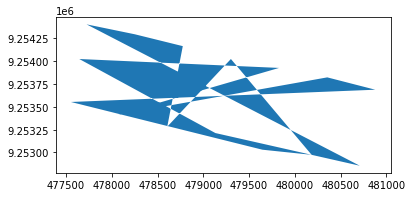

In [3]:
poly = polygon_from_coord(coordinates, convex_hull=False)
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=32718))
poly.plot()

<AxesSubplot:>

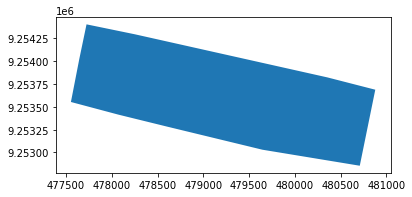

In [4]:
poly = polygon_from_coord(coordinates, convex_hull=True)
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=32718))
poly.to_file('output_data/test2.geojson', driver='GeoJSON')
poly.plot()

<AxesSubplot:>

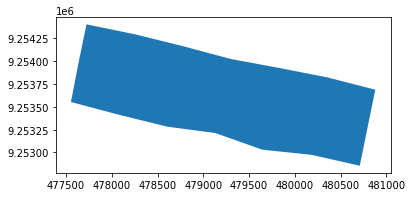

In [5]:
poly = polygon_from_coord(coordinates, mode='concave')
poly = gpd.GeoDataFrame(geometry=gpd.GeoSeries(poly, crs=32718))
poly.to_file('output_data/test3.geojson', driver='GeoJSON')
poly.plot()

### Applies "voronoi_splitter" function and retrieves the result in an object called "result"

The arguments of the function voronoi_splitter are:
- Input polygon as a geopandas object
- Number of sub-polygons for the output (the number of smaller polygons requested as an output)
- CRS (coordinate reference system) of the input
- Number of random points used to build the Voronoi's polygons, the bigger the number the less variance in the areas of the resulting polygons (but also a big number of point can make the function slow, and eventually break the procces)
- The seed is just for make reproductible the random point generation, does't matter in this case and is set by default to 1

In [6]:
# define mean wanted area for the subpolygons
subpoly_area = 10000

print('Polygon area: {} sq. mt'.format(round(poly.area.values[0])))

n_subpolygons = round(poly.area.values[0]/subpoly_area)
n_subpolygons

Polygon area: 2833575 sq. mt


283

In [8]:
import time

In [10]:
start = time.time()

result = voronoi_splitter(poly, 283, crs='EPSG:32718', npoints=20000, seed=1)
result.head(3)

print(time.time()-start)

A total of 283 polygons where created.
Areas range from 6346 to 13630 square meters
The mean area is 10013 square meters
14.196473836898804


<AxesSubplot:>

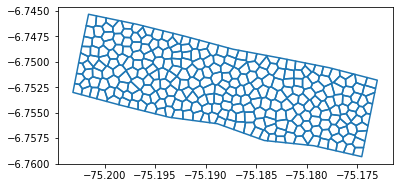

In [11]:
result.boundary.plot()

### Saves to JSON

The arguments of the function are:
- Output path for the JSON file
- Geopandas object which should be the output of the voronoi_splitter function
- The fields to include in the JSON file

In [12]:
json_writer('output_data/voronois_pol_b.json', result, ['id', 'area', 'coordinates', 'centroid'])

JSON file was writen in output_data/voronois_pol_b.json


### Saves to GeoJSON (can be loaded in any desktop GIS, like QGIS)

In [13]:
result.to_file('output_data/voronois_pol_b.geojson', driver='GeoJSON')

### Plot histogram of areas

(array([ 3.,  1.,  0.,  1.,  8.,  5.,  7.,  9.,  9., 10., 13., 13., 18.,
        20., 27., 24., 16., 11., 11., 19., 13.,  8.,  9.,  5.,  9.,  8.,
         1.,  3.,  1.,  1.]),
 array([ 6346.5       ,  6589.26666667,  6832.03333333,  7074.8       ,
         7317.56666667,  7560.33333333,  7803.1       ,  8045.86666667,
         8288.63333333,  8531.4       ,  8774.16666667,  9016.93333333,
         9259.7       ,  9502.46666667,  9745.23333333,  9988.        ,
        10230.76666667, 10473.53333333, 10716.3       , 10959.06666667,
        11201.83333333, 11444.6       , 11687.36666667, 11930.13333333,
        12172.9       , 12415.66666667, 12658.43333333, 12901.2       ,
        13143.96666667, 13386.73333333, 13629.5       ]),
 <BarContainer object of 30 artists>)

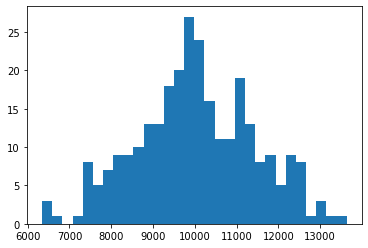

In [14]:
area = result['area']
fig, axs = plt.subplots(1)
axs.hist(area, bins=30)